In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../../Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

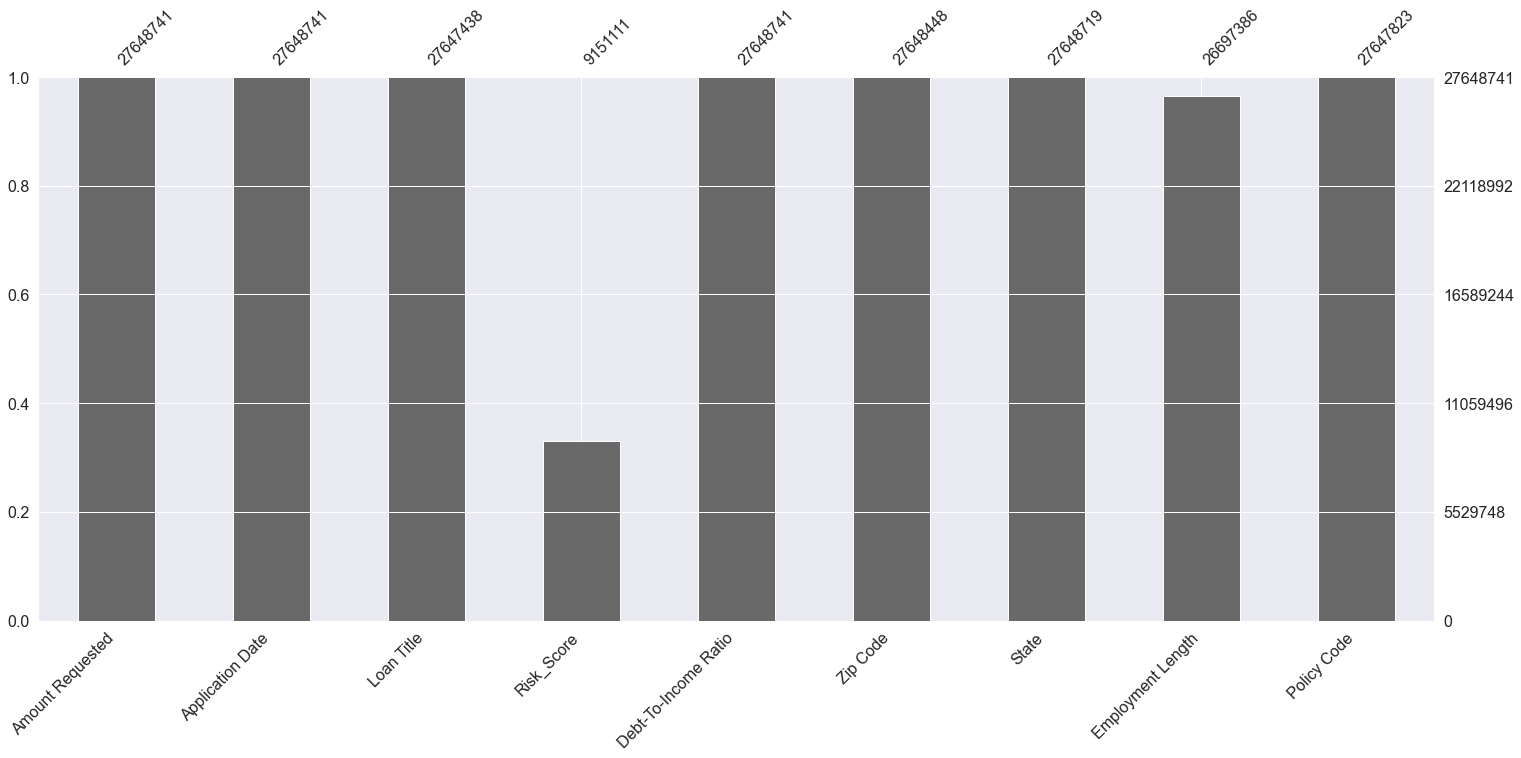

In [5]:
msnum.bar(rejected);

In [6]:
rejected['Policy Code'].value_counts()

0.0    27559694
2.0       88129
Name: Policy Code, dtype: int64

In [85]:
rejected['Application Date'].value_counts()

2018-12-04    42112
2018-09-12    40849
2018-12-05    40394
2018-05-14    40390
2018-12-10    40055
              ...  
2007-08-19        2
2007-06-16        2
2007-07-28        2
2007-05-26        2
2007-06-07        1
Name: Application Date, Length: 4238, dtype: int64

In [7]:
r = rejected.dropna().reset_index(drop=True)

In [8]:
r

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,Debt consolidation,681.0,55.15%,726xx,AR,< 1 year,0.0
8992191,1000.0,2016-12-31,Debt consolidation,531.0,31.31%,761xx,TX,< 1 year,0.0
8992192,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
8992193,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0


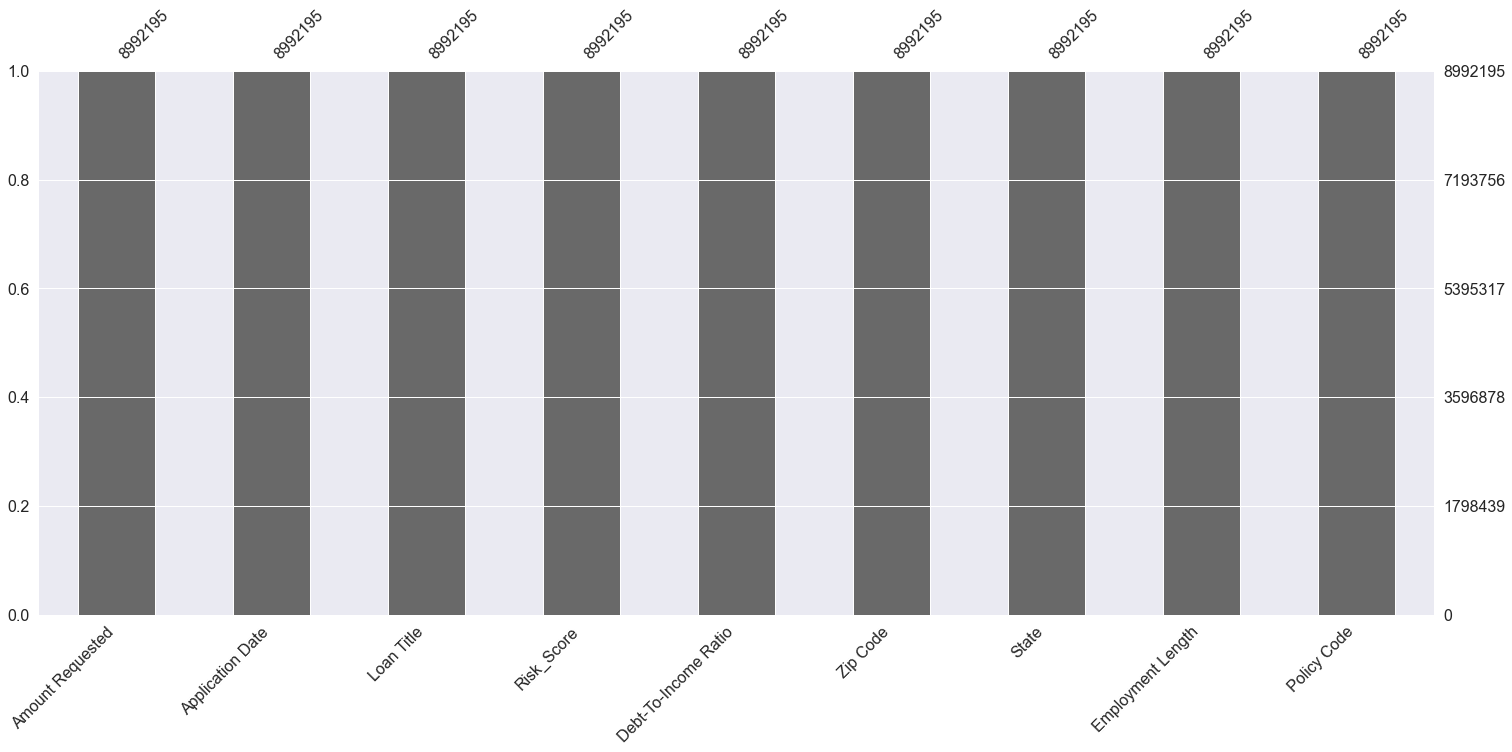

In [9]:
msnum.bar(r);

In [11]:
r = r[['Amount Requested','Application Date', 'Risk_Score', 'Debt-To-Income Ratio', 
       'Employment Length', 'Loan Title', 'State', 'Zip Code']]
r

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Employment Length,Loan Title,State,Zip Code
0,1000.0,2007-05-26,693.0,10%,4 years,Wedding Covered but No Honeymoon,NM,481xx
1,1000.0,2007-05-26,703.0,10%,< 1 year,Consolidating Debt,MA,010xx
2,11000.0,2007-05-27,715.0,10%,1 year,Want to consolidate my debt,MD,212xx
3,6000.0,2007-05-27,698.0,38.64%,< 1 year,waksman,MA,017xx
4,1500.0,2007-05-27,509.0,9.43%,< 1 year,mdrigo,MD,209xx
...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,681.0,55.15%,< 1 year,Debt consolidation,AR,726xx
8992191,1000.0,2016-12-31,531.0,31.31%,< 1 year,Debt consolidation,TX,761xx
8992192,10000.0,2016-12-31,590.0,41.26%,< 1 year,Debt consolidation,OH,441xx
8992193,1200.0,2016-12-31,686.0,10.26%,< 1 year,Other,CA,914xx


In [12]:
r.dtypes

Amount Requested        float64
Application Date         object
Risk_Score              float64
Debt-To-Income Ratio     object
Employment Length        object
Loan Title               object
State                    object
Zip Code                 object
dtype: object

In [13]:
#r['Policy Code'].value_counts()

In [14]:
pd.read_excel('../../Data/LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [15]:
#r = r[['Risk_Score', 'Debt-To-Income Ratio']]
#r

In [16]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [17]:
r

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code
0,1000.0,2007-05-26,693.0,10%,4 years,Wedding Covered but No Honeymoon,NM,481xx
1,1000.0,2007-05-26,703.0,10%,< 1 year,Consolidating Debt,MA,010xx
2,11000.0,2007-05-27,715.0,10%,1 year,Want to consolidate my debt,MD,212xx
3,6000.0,2007-05-27,698.0,38.64%,< 1 year,waksman,MA,017xx
4,1500.0,2007-05-27,509.0,9.43%,< 1 year,mdrigo,MD,209xx
...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,681.0,55.15%,< 1 year,Debt consolidation,AR,726xx
8992191,1000.0,2016-12-31,531.0,31.31%,< 1 year,Debt consolidation,TX,761xx
8992192,10000.0,2016-12-31,590.0,41.26%,< 1 year,Debt consolidation,OH,441xx
8992193,1200.0,2016-12-31,686.0,10.26%,< 1 year,Other,CA,914xx


In [18]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [19]:
r

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code
0,1000.0,2007-05-26,693.0,0.1000,4 years,Wedding Covered but No Honeymoon,NM,481xx
1,1000.0,2007-05-26,703.0,0.1000,< 1 year,Consolidating Debt,MA,010xx
2,11000.0,2007-05-27,715.0,0.1000,1 year,Want to consolidate my debt,MD,212xx
3,6000.0,2007-05-27,698.0,0.3864,< 1 year,waksman,MA,017xx
4,1500.0,2007-05-27,509.0,0.0943,< 1 year,mdrigo,MD,209xx
...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,681.0,0.5515,< 1 year,Debt consolidation,AR,726xx
8992191,1000.0,2016-12-31,531.0,0.3131,< 1 year,Debt consolidation,TX,761xx
8992192,10000.0,2016-12-31,590.0,0.4126,< 1 year,Debt consolidation,OH,441xx
8992193,1200.0,2016-12-31,686.0,0.1026,< 1 year,Other,CA,914xx


In [20]:
r = r.assign(Accepted = 0)
r

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,1000.0,2007-05-26,693.0,0.1000,4 years,Wedding Covered but No Honeymoon,NM,481xx,0
1,1000.0,2007-05-26,703.0,0.1000,< 1 year,Consolidating Debt,MA,010xx,0
2,11000.0,2007-05-27,715.0,0.1000,1 year,Want to consolidate my debt,MD,212xx,0
3,6000.0,2007-05-27,698.0,0.3864,< 1 year,waksman,MA,017xx,0
4,1500.0,2007-05-27,509.0,0.0943,< 1 year,mdrigo,MD,209xx,0
...,...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,681.0,0.5515,< 1 year,Debt consolidation,AR,726xx,0
8992191,1000.0,2016-12-31,531.0,0.3131,< 1 year,Debt consolidation,TX,761xx,0
8992192,10000.0,2016-12-31,590.0,0.4126,< 1 year,Debt consolidation,OH,441xx,0
8992193,1200.0,2016-12-31,686.0,0.1026,< 1 year,Other,CA,914xx,0


In [21]:
r.dtypes

Amount Requested     float64
Application Date      object
Risk_Score           float64
DI                   float64
Employment Length     object
Loan Title            object
State                 object
Zip Code              object
Accepted               int64
dtype: object

In [22]:
r.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,8.992195e+06,8.992195e+06,8.992195e+06,8992195.0
mean,1.263456e+04,6.273498e+02,1.695741e+00,0.0
std,1.090297e+04,8.993268e+01,1.776824e+02,0.0
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.0
25%,4.000000e+03,5.910000e+02,9.060000e-02,0.0
50%,1.000000e+04,6.360000e+02,2.055000e-01,0.0
75%,2.000000e+04,6.740000e+02,3.626000e-01,0.0
max,1.400000e+06,9.900000e+02,5.000003e+05,0.0


In [23]:
accepted = pd.read_csv('../../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [36]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'zip_code', 'policy_code']]

In [37]:
a.shape

(2260701, 10)

In [38]:
a['policy_code'].value_counts(dropna=False)

1.0    2260668
NaN         33
Name: policy_code, dtype: int64

In [39]:
a.isnull().sum()

loan_amnt              33
issue_d                33
purpose                33
fico_range_low         33
fico_range_high        33
annual_inc             37
emp_length         146940
addr_state             33
zip_code               34
policy_code            33
dtype: int64

In [40]:
a[a.annual_inc == 0] 

,loan_amnt,issue_d,purpose,fico_range_low,fico_range_high,annual_inc,emp_length,addr_state,zip_code,policy_code
18202,20000.0,Dec-2015,debt_consolidation,685.0,689.0,0.0,NaN,TX,760xx,1.0
65620,3700.0,Nov-2015,credit_card,680.0,684.0,0.0,NaN,TX,765xx,1.0
421705,40000.0,Mar-2018,home_improvement,695.0,699.0,0.0,NaN,TX,750xx,1.0
422321,40000.0,Mar-2018,debt_consolidation,755.0,759.0,0.0,NaN,WA,968xx,1.0
422379,3000.0,Mar-2018,other,790.0,794.0,0.0,2 years,AR,724xx,1.0
...,...,...,...,...,...,...,...,...,...,...
2228436,8750.0,Oct-2016,debt_consolidation,715.0,719.0,0.0,NaN,AR,726xx,1.0
2228456,18000.0,Oct-2016,debt_consolidation,680.0,684.0,0.0,< 1 year,NY,138xx,1.0
2230378,10000.0,Oct-2016,credit_card,705.0,709.0,0.0,NaN,MD,215xx,1.0
2232830,23950.0,Oct-2016,debt_consolidation,670.0,674.0,0.0,NaN,IL,606xx,1.0


In [41]:
a = a.drop(a[a.annual_inc == 0].index)

In [42]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [43]:
a = a.assign(Accepted = 1)

In [44]:
a.shape

(2259034, 12)

In [45]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [46]:
a = a.rename(columns={'purpose':"Loan Title"})

In [47]:
a = a.rename(columns={'loan_amnt':'Amount Requested'})

In [48]:
a = a.rename(columns={'policy_code':'Policy Code'})

In [49]:
a = a.rename(columns={'addr_state':'State'})

In [50]:
a = a.rename(columns={'zip_code':'Zip Code'})

In [51]:
a = a.rename(columns={'issue_d':'Application Date'})

In [52]:
a = a.assign(DI = (a['Amount Requested'] / a['annual_inc']))

In [53]:
a = a[['Amount Requested','Application Date','Risk_Score', 'DI', 'emp_length', 'Loan Title', 'State', 'Zip Code', 'Accepted']]

In [54]:
a = a.rename(columns={"emp_length":"Employment Length"})

In [55]:
a

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,3600.0,Dec-2015,677.0,0.065455,10+ years,debt_consolidation,PA,190xx,1
1,24700.0,Dec-2015,717.0,0.380000,10+ years,small_business,SD,577xx,1
2,20000.0,Dec-2015,697.0,0.317460,10+ years,home_improvement,IL,605xx,1
3,35000.0,Dec-2015,787.0,0.318182,10+ years,debt_consolidation,NJ,076xx,1
4,10400.0,Dec-2015,697.0,0.099585,3 years,major_purchase,PA,174xx,1
...,...,...,...,...,...,...,...,...,...
2260696,40000.0,Oct-2016,707.0,0.176211,9 years,debt_consolidation,CA,907xx,1
2260697,24000.0,Oct-2016,662.0,0.218182,6 years,debt_consolidation,FL,334xx,1
2260698,14000.0,Oct-2016,662.0,0.147368,10+ years,debt_consolidation,TX,770xx,1
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [56]:
a.isna().sum()

Amount Requested         33
Application Date         33
Risk_Score               33
DI                       37
Employment Length    145373
Loan Title               33
State                    33
Zip Code                 34
Accepted                  0
dtype: int64

In [57]:
a['Employment Length'] = a['Employment Length'].replace(np.nan, 'None')

In [58]:
a

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,3600.0,Dec-2015,677.0,0.065455,10+ years,debt_consolidation,PA,190xx,1
1,24700.0,Dec-2015,717.0,0.380000,10+ years,small_business,SD,577xx,1
2,20000.0,Dec-2015,697.0,0.317460,10+ years,home_improvement,IL,605xx,1
3,35000.0,Dec-2015,787.0,0.318182,10+ years,debt_consolidation,NJ,076xx,1
4,10400.0,Dec-2015,697.0,0.099585,3 years,major_purchase,PA,174xx,1
...,...,...,...,...,...,...,...,...,...
2260696,40000.0,Oct-2016,707.0,0.176211,9 years,debt_consolidation,CA,907xx,1
2260697,24000.0,Oct-2016,662.0,0.218182,6 years,debt_consolidation,FL,334xx,1
2260698,14000.0,Oct-2016,662.0,0.147368,10+ years,debt_consolidation,TX,770xx,1
2260699,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,1


In [59]:
a.shape

(2259034, 9)

In [60]:
a.isna().sum()

Amount Requested     33
Application Date     33
Risk_Score           33
DI                   37
Employment Length     0
Loan Title           33
State                33
Zip Code             34
Accepted              0
dtype: int64

In [61]:
a = a.dropna()

In [62]:
a.isna().sum()

Amount Requested     0
Application Date     0
Risk_Score           0
DI                   0
Employment Length    0
Loan Title           0
State                0
Zip Code             0
Accepted             0
dtype: int64

In [63]:
a.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,2.258996e+06,2.258996e+06,2.258996e+06,2258996.0
mean,1.504390e+04,7.005790e+02,5.738794e-01,1.0
std,9.188089e+03,3.300490e+01,8.876417e+01,0.0
min,5.000000e+02,6.120000e+02,1.612903e-04,1.0
25%,8.000000e+03,6.770000e+02,1.250000e-01,1.0
50%,1.290000e+04,6.920000e+02,2.000000e-01,1.0
75%,2.000000e+04,7.170000e+02,2.985075e-01,1.0
max,4.000000e+04,8.475000e+02,4.000000e+04,1.0


In [64]:
a.shape

(2258996, 9)

In [84]:
a['Application Date'].value_counts()

Mar-2016    61981
Oct-2015    48631
Oct-2018    46216
May-2018    46194
Aug-2018    45967
            ...  
Aug-2007       72
Jul-2007       62
Sep-2008       57
Sep-2007       53
Jun-2007       23
Name: Application Date, Length: 139, dtype: int64

In [65]:
r.head(2)

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,1000.0,2007-05-26,693.0,0.1,4 years,Wedding Covered but No Honeymoon,NM,481xx,0
1,1000.0,2007-05-26,703.0,0.1,< 1 year,Consolidating Debt,MA,010xx,0


In [66]:
a.head(2)

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,3600.0,Dec-2015,677.0,0.065455,10+ years,debt_consolidation,PA,190xx,1
1,24700.0,Dec-2015,717.0,0.380000,10+ years,small_business,SD,577xx,1


In [67]:
combo = pd.concat([a,r]).reset_index(drop=True)
combo

,Amount Requested,Application Date,Risk_Score,DI,Employment Length,Loan Title,State,Zip Code,Accepted
0,3600.0,Dec-2015,677.0,0.065455,10+ years,debt_consolidation,PA,190xx,1
1,24700.0,Dec-2015,717.0,0.380000,10+ years,small_business,SD,577xx,1
2,20000.0,Dec-2015,697.0,0.317460,10+ years,home_improvement,IL,605xx,1
3,35000.0,Dec-2015,787.0,0.318182,10+ years,debt_consolidation,NJ,076xx,1
4,10400.0,Dec-2015,697.0,0.099585,3 years,major_purchase,PA,174xx,1
...,...,...,...,...,...,...,...,...,...
11251186,30000.0,2016-12-31,681.0,0.551500,< 1 year,Debt consolidation,AR,726xx,0
11251187,1000.0,2016-12-31,531.0,0.313100,< 1 year,Debt consolidation,TX,761xx,0
11251188,10000.0,2016-12-31,590.0,0.412600,< 1 year,Debt consolidation,OH,441xx,0
11251189,1200.0,2016-12-31,686.0,0.102600,< 1 year,Other,CA,914xx,0


In [68]:
combo.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,1.125119e+07,1.125119e+07,1.125119e+07,1.125119e+07
mean,1.311830e+04,6.420526e+02,1.470495e+00,2.007784e-01
std,1.062491e+04,8.685177e+01,1.637510e+02,4.005826e-01
min,1.500000e+02,0.000000e+00,-1.000000e-02,0.000000e+00
25%,5.000000e+03,6.040000e+02,1.000000e-01,0.000000e+00
50%,1.000000e+04,6.540000e+02,2.038000e-01,0.000000e+00
75%,2.000000e+04,6.890000e+02,3.458000e-01,0.000000e+00
max,1.400000e+06,9.900000e+02,5.000003e+05,1.000000e+00


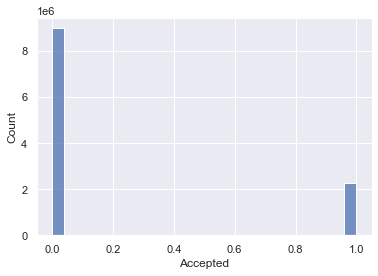

In [69]:
sns.histplot(data=combo, x='Accepted');

In [70]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [71]:
few.describe()

,Amount Requested,Risk_Score,DI,Accepted
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,13221.049240,642.479646,1.347162,0.200782
std,10679.200056,85.688368,36.167581,0.400603
min,1000.000000,0.000000,-0.010000,0.000000
25%,5000.000000,605.000000,0.100817,0.000000
50%,10000.000000,655.000000,0.203400,0.000000
75%,20000.000000,688.000000,0.346800,0.000000
max,45850.000000,990.000000,1999.980000,1.000000


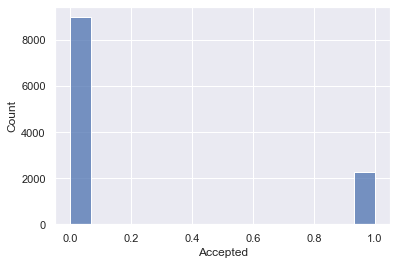

In [72]:
sns.histplot(data=few, x='Accepted');

In [73]:
few.isna().sum()

Amount Requested     0
Application Date     0
Risk_Score           0
DI                   0
Employment Length    0
Loan Title           0
State                0
Zip Code             0
Accepted             0
dtype: int64

In [74]:
from pycaret.classification import *

In [75]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length', 'Loan Title'])

,Description,Value
0,session_id,2446
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11251, 9)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9952,0.9994,0.9923,0.9837,0.9879,0.9849,0.9850,0.2670
catboost,CatBoost Classifier,0.9948,0.9993,1.0000,0.9746,0.9871,0.9838,0.9840,1.0040
gbc,Gradient Boosting Classifier,0.9945,0.9994,0.9987,0.9746,0.9865,0.9830,0.9832,1.0780
ada,Ada Boost Classifier,0.9937,0.9985,0.9898,0.9787,0.9841,0.9802,0.9802,0.3520
dt,Decision Tree Classifier,0.9935,0.9919,0.9891,0.9786,0.9838,0.9798,0.9798,0.0430
et,Extra Trees Classifier,0.9926,0.9992,0.9827,0.9804,0.9815,0.9769,0.9770,0.3900
lr,Logistic Regression,0.9882,0.9983,0.9808,0.9607,0.9706,0.9632,0.9634,0.5950
ridge,Ridge Classifier,0.9784,0.0000,0.9994,0.9029,0.9486,0.9350,0.9370,0.1070
lda,Linear Discriminant Analysis,0.9784,0.9935,0.9994,0.9029,0.9486,0.9350,0.9370,1.2210
nb,Naive Bayes,0.9501,0.9978,0.9987,0.8008,0.8886,0.8570,0.8659,0.0560


In [77]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2446, verbose=0,
                       warm_start=False)


In [78]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [79]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9937,0.9996,0.9936,0.9748,0.9841,0.9802,0.9802
1,0.9937,1.0000,0.9682,1.0000,0.9838,0.9799,0.9801
2,0.9937,0.9981,0.9936,0.9750,0.9842,0.9803,0.9803
3,0.9937,0.9994,1.0000,0.9691,0.9843,0.9803,0.9805
4,0.9962,0.9988,1.0000,0.9812,0.9905,0.9882,0.9882
5,0.9987,1.0000,0.9936,1.0000,0.9968,0.9960,0.9960
6,0.9962,1.0000,0.9936,0.9873,0.9904,0.9880,0.9880
7,0.9924,0.9985,0.9872,0.9747,0.9809,0.9761,0.9762
8,0.9949,0.9995,0.9936,0.9810,0.9873,0.9841,0.9841


In [80]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2446, verbose=0,
                       warm_start=False)


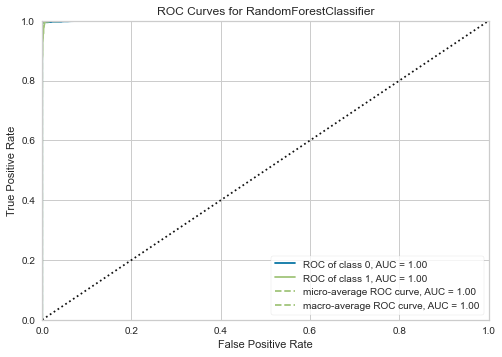

In [81]:
plot_model(rf, plot='auc')

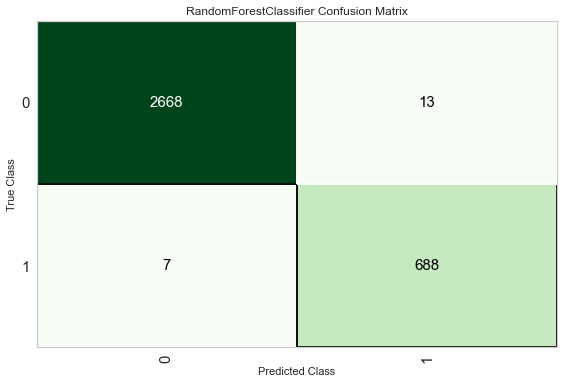

In [82]:
plot_model(rf, plot='confusion_matrix')

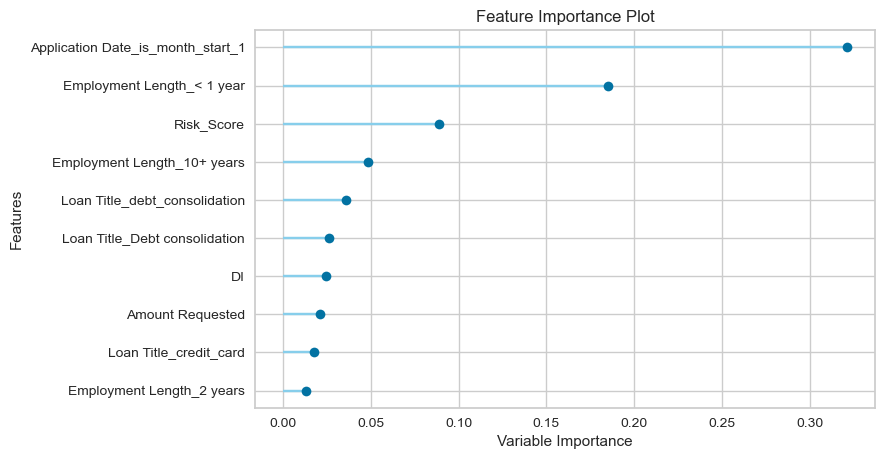

In [83]:
plot_model(rf, plot='feature')

In [86]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9949,0.9998,1.0000,0.9750,0.9873,0.9842,0.9843
1,0.9949,0.9997,1.0000,0.9752,0.9874,0.9842,0.9844
2,0.9937,0.9983,1.0000,0.9691,0.9843,0.9803,0.9805
3,0.9911,0.9992,1.0000,0.9573,0.9782,0.9726,0.9730
4,0.9924,0.9987,1.0000,0.9632,0.9812,0.9765,0.9767
5,0.9975,1.0000,1.0000,0.9873,0.9936,0.9920,0.9921
6,0.9975,0.9999,1.0000,0.9873,0.9936,0.9920,0.9921
7,0.9949,0.9990,1.0000,0.9750,0.9873,0.9842,0.9843
8,0.9924,0.9985,1.0000,0.9630,0.9811,0.9764,0.9766


In [87]:
print(cb)

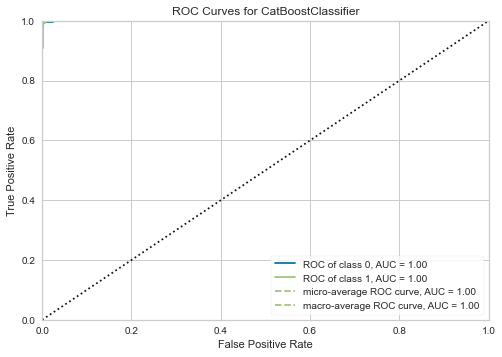

In [88]:
plot_model(cb, plot='auc')

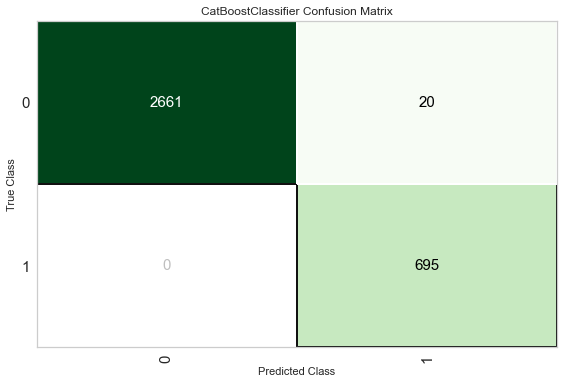

In [89]:
plot_model(cb, plot='confusion_matrix')

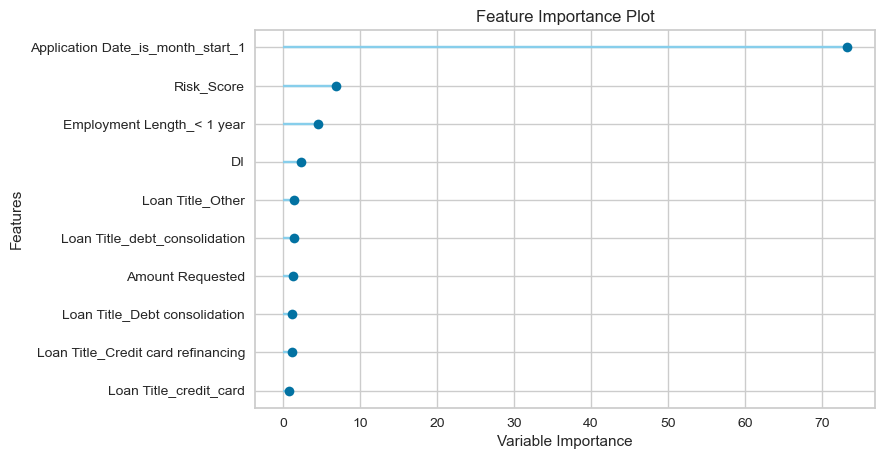

In [90]:
plot_model(cb, plot='feature')

In [ ]:
##Policy Code is internal way of assigning reject/accept/danger (0, 1, 2). 
##It's not available at time of application. 

In [ ]:
#State and Zip Code have no importance. 

In [ ]:
#Really not sure what "Application Date_is_month_start_1". It might just be the category 
#assigned to all Dates (all dates have a first month), and thereby not providing much informational value. 